In [10]:
import pandas as pd 
import numpy as np
import pyjags
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import arviz as az

In [2]:
import numpy as np
leucemia = pd.read_csv("http://gente.itam.mx/lnieto/index_archivos/leucemia.txt", sep="\t")
leucemia.columns = ['cancer', 'place', 'age', 'obs', 'esp', 'pops']
n = leucemia.shape[0]
leucemia

,cancer,place,age,obs,esp,pops
0,1,1,1,38,24.08,103857
1,1,1,2,13,36.12,155786
2,1,2,1,51,31.52,135943
3,1,2,2,37,47.28,203914
4,2,1,1,5,7.97,103857
5,2,1,2,8,11.95,155786
6,2,2,1,13,10.43,135943
7,2,2,2,20,15.65,203914


### Efectos intercambiables

In [8]:
# Definimos datos
data = {
    "n":n,
    "y":leucemia['obs'].values,
    "ne": leucemia['pops'].values/10000,
}

# Valores iniciales
inits_a = {"theta": 1, 'yf1': np.repeat(0, n)}
inits_a = [inits_a, inits_a]

# Parametros a monitorear
params_a = ['theta', 'yf1']

# Modelo
with open('ej7a.txt', 'r') as f:
    code_a = f.read()

model_a = pyjags.Model(code_a, 
                       data=data,
                       chains=2,
                       init=inits_a,
                       adapt=5000)
model_a.update(5000)
samples_a = model_a.sample(50000, vars=params_a)

updating: iterations 10000 of 10000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 100000 of 100000, elapsed 0:00:00, remaining 0:00:00


In [19]:
# Tabla de resultados
idata_a = az.from_pyjags(samples_a)

# Obtenemos un resumen estadístico
summary_colums = ['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']
summary_a = az.summary(idata_a, var_names=["theta"])[summary_colums]

summary_a.to_latex(float_format="%.4f")


'\\begin{tabular}{lrrrrr}\n\\toprule\n & mean & sd & hdi_3% & hdi_97% & r_hat \\\\\n\\midrule\ntheta & 1.5430 & 0.1130 & 1.3300 & 1.7570 & 1.0000 \\\\\n\\bottomrule\n\\end{tabular}\n'

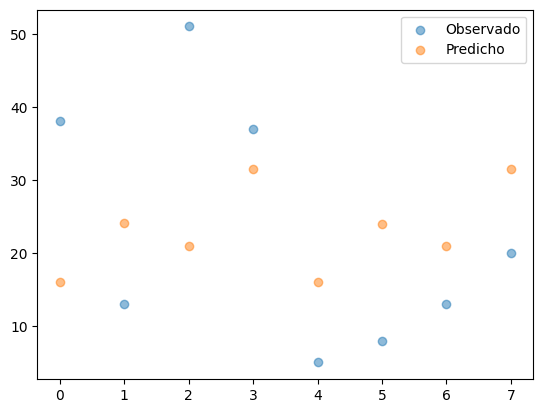

In [35]:
# Figura 1
import matplotlib.pyplot as plt
y_obs = leucemia['obs']
y_pred = az.summary(idata_a, var_names=["yf1"])['mean']
fix, ax = plt.subplots()
ax.scatter(np.arange(len(y_obs)), y_obs, alpha=0.5, label ='Observado')
ax.scatter(np.arange(len(y_pred)), y_pred, alpha=0.5, label='Predicho')
ax.legend()
